In [97]:
# Descriptive Analytics
import findspark
findspark.init('/opt/spark')
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
data = spark.read.csv('./MOCK_DATA.csv', inferSchema=True, header=True)
data.show()

+--------------------+--------+-----------------+------+---------+-----+
|                  id|    time|doppler_frequency|weight|IR_Sensor|label|
+--------------------+--------+-----------------+------+---------+-----+
|87e1edb0-f1ce-48a...| 6:20:13|            102.7| 75.24|      101|    0|
|5b174bee-0f6f-476...|15:51:59|           107.61| 70.26|       89|    0|
|923ea99e-74b8-4ad...|15:21:04|           100.99| 73.38|      223|    0|
|c49fe2e1-c20c-445...|12:33:55|           105.95| 77.89|       64|    0|
|49171217-57a9-48e...| 8:07:46|            89.35| 71.47|      164|    0|
|5cfd855c-86e9-4e6...|23:54:55|           105.38| 74.72|       13|    1|
|ac845a19-b37d-4d6...|11:10:14|            94.26| 63.88|      110|    0|
|d966519e-047a-413...|16:23:18|            102.6| 59.14|       13|    1|
|b2f0f47f-6280-4f3...| 5:52:29|           107.38| 78.22|      163|    0|
|4b6474fd-ebb5-465...| 0:42:18|           111.73| 68.41|       51|    0|
|b9bbc6fa-9b84-4f4...| 7:20:09|           106.81| 8

In [98]:
data_pd = data.toPandas()

In [99]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   time               1000 non-null   object 
 2   doppler_frequency  1000 non-null   float64
 3   weight             1000 non-null   float64
 4   IR_Sensor          1000 non-null   int32  
 5   label              1000 non-null   int32  
dtypes: float64(2), int32(2), object(2)
memory usage: 39.2+ KB


In [100]:
data_pd.describe()

,doppler_frequency,weight,IR_Sensor,label
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,99.944100,74.954200,128.00300,0.501000
std,6.324947,5.084375,74.13144,0.500249
min,81.690000,56.830000,0.00000,0.000000
25%,95.570000,71.497500,64.75000,0.000000
50%,100.165000,75.030000,128.00000,1.000000
75%,104.362500,78.267500,193.00000,1.000000
max,119.180000,89.920000,255.00000,1.000000


In [101]:
data_pd.doppler_frequency

0      102.70
1      107.61
2      100.99
3      105.95
4       89.35
        ...  
995     93.86
996    108.31
997    101.66
998    100.30
999    101.35
Name: doppler_frequency, Length: 1000, dtype: float64

In [102]:
col_1 = data_pd['doppler_frequency']
col_2 = data_pd['label']
data_pd.corr()

,doppler_frequency,weight,IR_Sensor,label
doppler_frequency,1.000000,-0.011976,0.017434,-0.028876
weight,-0.011976,1.000000,-0.026946,-0.055533
IR_Sensor,0.017434,-0.026946,1.000000,0.002848
label,-0.028876,-0.055533,0.002848,1.000000


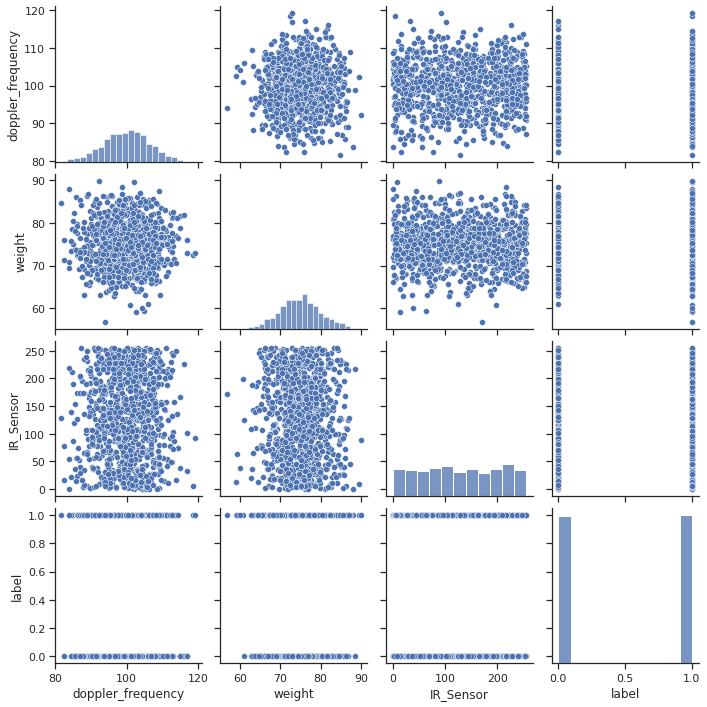

In [103]:
# The below graphs show the correlation between different parameters
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(data_pd)
plt.show()

In [104]:
doppler_frequency_data = data_pd[['doppler_frequency', 'time']]

In [105]:
doppler_frequency_data.head()

,doppler_frequency,time
0,102.70,6:20:13
1,107.61,15:51:59
2,100.99,15:21:04
3,105.95,12:33:55
4,89.35,8:07:46


In [106]:
vehicle_movement = doppler_frequency_data[doppler_frequency_data.doppler_frequency > 100]

In [107]:
vehicle_movement.head()

,doppler_frequency,time
0,102.70,6:20:13
1,107.61,15:51:59
2,100.99,15:21:04
3,105.95,12:33:55
5,105.38,23:54:55


In [114]:
from datetime import datetime
def convert_to_category(t):
    nt = datetime.strptime(t, '%H:%M:%S')
    if nt.hour < 12:
        return "morning"
    elif nt.hour == 12:
        return "noon"
    elif nt.hour > 12 and nt.hour < 16:
        return "evening"
    else:
        return "night"
vehicle_movement['time'].apply(convert_to_category)

ValueError: time data 'morning' does not match format '%H:%M:%S'

In [115]:
vehicle_movement.head()

,doppler_frequency,time
0,102.70,morning
1,107.61,evening
2,100.99,evening
3,105.95,noon
5,105.38,night


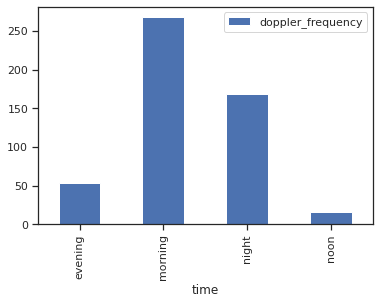

In [116]:
import matplotlib
vehicle_agg = vehicle_movement.groupby('time').agg('count').plot(kind='bar')